   Class  Feature 0  Feature 1
0      0  -1.539414  -0.725655
1      1   2.393162  -1.325898
2      0   0.155954   0.220874
3      1   0.504340  -0.442217
4      1  -0.288748  -0.047166


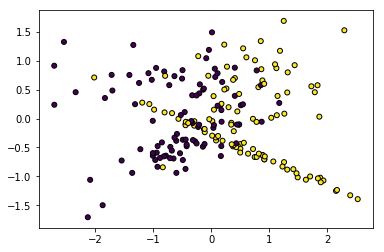

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student_identity = 'devarshjhaveri'

filenameToRead = '5challenge_training_' + student_identity + '.csv'
training_df = pd.read_csv('5Files/' + filenameToRead, index_col=0)

print(training_df.head())

X1 = training_df[['Feature 0', 'Feature 1']].values
Y1 = training_df['Class'].values
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

plt.show()

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [3]:
C_range=np.linspace(0.1,20,20)
print(C_range)
gamma_range=np.linspace(0.1,20,20)
print(gamma_range)

[ 0.1         1.14736842  2.19473684  3.24210526  4.28947368  5.33684211
  6.38421053  7.43157895  8.47894737  9.52631579 10.57368421 11.62105263
 12.66842105 13.71578947 14.76315789 15.81052632 16.85789474 17.90526316
 18.95263158 20.        ]
[ 0.1         1.14736842  2.19473684  3.24210526  4.28947368  5.33684211
  6.38421053  7.43157895  8.47894737  9.52631579 10.57368421 11.62105263
 12.66842105 13.71578947 14.76315789 15.81052632 16.85789474 17.90526316
 18.95263158 20.        ]


In [4]:
parameters = {'gamma': gamma_range, 'C': C_range}
svc = svm.SVC(kernel='rbf')
clf = GridSearchCV(svc, parameters, cv=5)
grid_search = clf.fit(X1,Y1)

In [5]:
best_accuracy = grid_search.best_score_
print(best_accuracy)
best_parameters = grid_search.best_params_
print(best_parameters)

0.775
{'C': 4.289473684210526, 'gamma': 2.194736842105263}


In [6]:
grid_search.best_estimator_ 

SVC(C=4.289473684210526, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2.194736842105263,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:

from sklearn.model_selection import KFold 

kf = KFold(n_splits=5, shuffle=True, random_state=0)
score_total = 0

for train_index, test_index in kf.split(X1):
    train_x, test_x = X1[train_index], X1[test_index]
    train_y, test_y = Y1[train_index], Y1[test_index]
    clf = svm.SVC(kernel='rbf',C = 4.289473684210526, gamma = 2.194736842105263 )
    clf = clf.fit(train_x,train_y)
    y_pred = clf.predict(test_x)
    score = clf.score(test_x,test_y)
    score_total += score
    print("Score :" , score)

print("Average Score :",score_total/5)

Score : 0.775
Score : 0.75
Score : 0.675
Score : 0.9
Score : 0.85
Average Score : 0.79


   Class  Feature 0  Feature 1
0    NaN   0.070703  -0.349796
1    NaN   0.625467   0.252353
2    NaN   1.768690  -1.068718
3    NaN   1.911645  -1.145041
4    NaN   0.191686  -0.412174


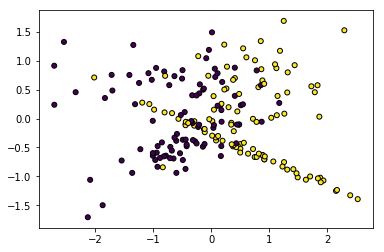

In [8]:
filenameToRead_test = '5challenge_testing_' + student_identity + '.csv'
testing_df = pd.read_csv('5Files/' + filenameToRead_test, index_col=0)
print(testing_df.head())

X_test = testing_df[['Feature 0', 'Feature 1']].values
Y_test = testing_df['Class'].values
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

plt.show()

In [9]:
clf_best = grid_search.best_estimator_ 
y_test=clf_best.predict(X_test)

In [10]:
testing_df['Class'] = y_test

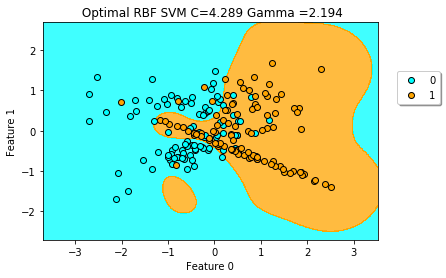

In [11]:
from matplotlib.colors import ListedColormap
from matplotlib import pylab

X_set, y_set = X1, Y1

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
ax=plt.contourf(X1, X2, clf_best.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],edgecolors='k',
                c = ListedColormap(('cyan', 'orange'))(i), label = j)
plt.title(' Optimal RBF SVM C=4.289 Gamma =2.194')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(loc='upper right',  bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)
plt.show()

In [16]:
testing_df.to_csv('5challenge_testing_devarshjhaveri.csv')